# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

Google and Aravind Eye Hospital work: https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES/DATASETS

In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [ ]:
os.listdir('C:/Users/biokk/MINIPRO/SKIC/train')

['basal_cell_carcinoma',
 'melanoma',
 'nevus',
 'pigmented_benign_keratosis',
 'squamous_cell_carcinoma',
 'vascular_lesion']

In [ ]:
os.listdir(os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', 'C:/Users/biokk/MINIPRO/SKIC/train/basal_cell_carcinoma'))

['ISIC_0024504.jpg',
 'ISIC_0024515.jpg',
 'ISIC_0024550.jpg',
 'ISIC_0024564.jpg',
 'ISIC_0024572.jpg',
 'ISIC_0024573.jpg',
 'ISIC_0024582.jpg',
 'ISIC_0024590.jpg',
 'ISIC_0024595.jpg',
 'ISIC_0024632.jpg',
 'ISIC_0024634.jpg',
 'ISIC_0024665.jpg',
 'ISIC_0024666.jpg',
 'ISIC_0024673.jpg',
 'ISIC_0024743.jpg',
 'ISIC_0024787.jpg',
 'ISIC_0024795.jpg',
 'ISIC_0024799.jpg',
 'ISIC_0024829.jpg',
 'ISIC_0024833.jpg',
 'ISIC_0024848.jpg',
 'ISIC_0024885.jpg',
 'ISIC_0024897.jpg',
 'ISIC_0024931.jpg',
 'ISIC_0024949.jpg',
 'ISIC_0024984.jpg',
 'ISIC_0025019.jpg',
 'ISIC_0025031.jpg',
 'ISIC_0025046.jpg',
 'ISIC_0025102.jpg',
 'ISIC_0025144.jpg',
 'ISIC_0025260.jpg',
 'ISIC_0025266.jpg',
 'ISIC_0025285.jpg',
 'ISIC_0025299.jpg',
 'ISIC_0025301.jpg',
 'ISIC_0025322.jpg',
 'ISIC_0025362.jpg',
 'ISIC_0025383.jpg',
 'ISIC_0025417.jpg',
 'ISIC_0025433.jpg',
 'ISIC_0025467.jpg',
 'ISIC_0025509.jpg',
 'ISIC_0025513.jpg',
 'ISIC_0025530.jpg',
 'ISIC_0025557.jpg',
 'ISIC_0025576.jpg',
 'ISIC_002560

In [ ]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('C:/Users/biokk/MINIPRO/SKIC/train'):
    train_class = os.listdir(os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', i))
    for j in train_class:
        img = os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', i, j)
        train.append(img)
        label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 1954 



In [ ]:
train

['C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024504.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024515.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024550.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024564.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024572.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024573.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024582.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024590.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024595.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024632.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024634.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_0024665.jpg',
 'C:/Users/biokk/MINIPRO/SKIC/train\\basal_cell_carcinoma\\ISIC_

In [ ]:
label

['basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',
 'basal_cell_carcinoma',


MINI CHALLENGE #1: 
- Print out the count plot for all classes using Seaborn (External Research is Required)
sns.countplot(label)

C:\Users\biokk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

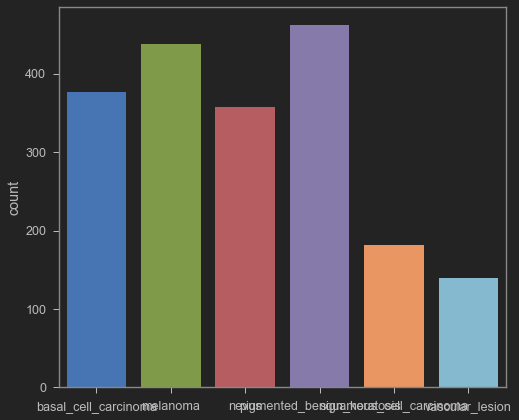

In [ ]:
sns.countplot(label)

# TASK #3: PERFORM DATA EXPLORATION AND DATA VISUALIZATION

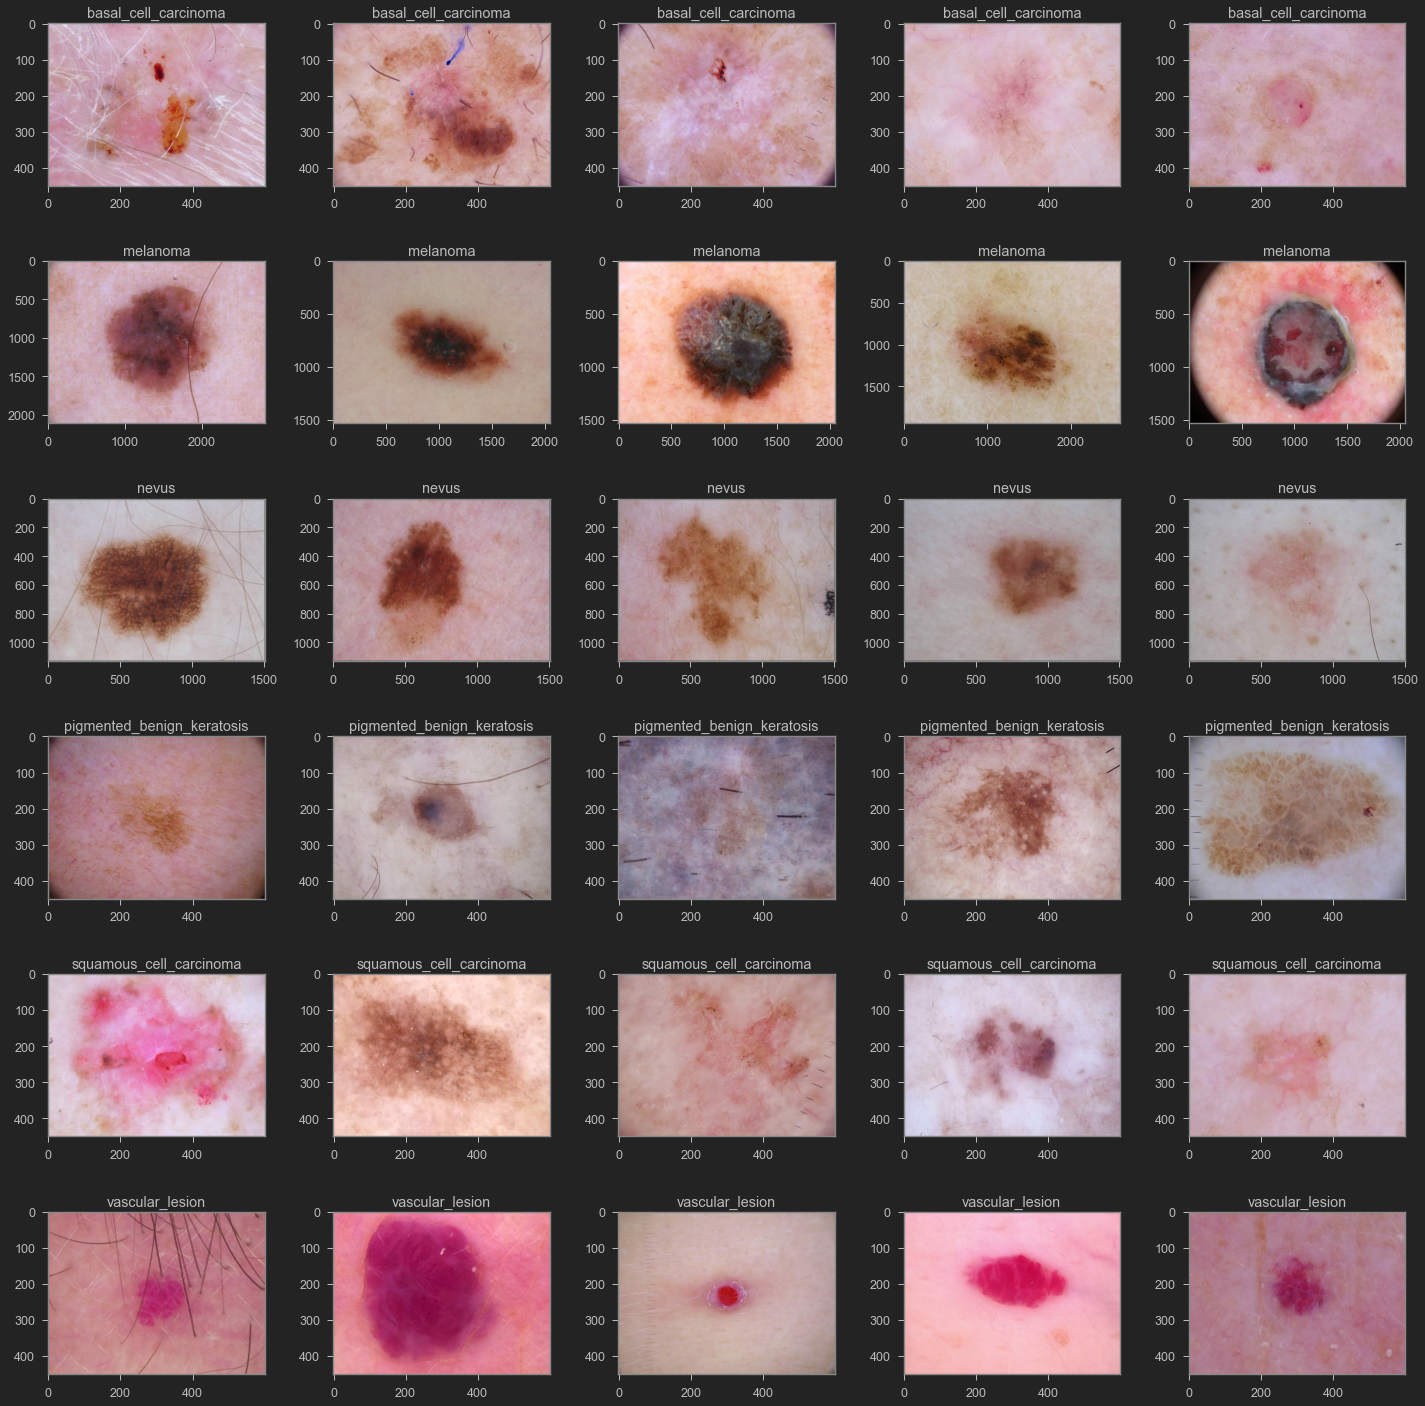

In [ ]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(6, 5, figsize = (20, 20))
count = 0
for i in os.listdir('C:/Users/biokk/MINIPRO/SKIC/train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [ ]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('C:/Users/biokk/MINIPRO/SKIC/train'):
  train_class = os.listdir(os.path.join('C:/Users/biokk/MINIPRO/SKIC/train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in basal_cell_carcinoma = 376 

Number of images in melanoma = 438 

Number of images in nevus = 358 

Number of images in pigmented_benign_keratosis = 462 

Number of images in squamous_cell_carcinoma = 181 

Number of images in vascular_lesion = 139 



In [ ]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

,Image,Labels
0,C:/Users/biokk/MINIPRO/SKIC/train\basal_cell_c...,basal_cell_carcinoma
1,C:/Users/biokk/MINIPRO/SKIC/train\basal_cell_c...,basal_cell_carcinoma
2,C:/Users/biokk/MINIPRO/SKIC/train\basal_cell_c...,basal_cell_carcinoma
3,C:/Users/biokk/MINIPRO/SKIC/train\basal_cell_c...,basal_cell_carcinoma
4,C:/Users/biokk/MINIPRO/SKIC/train\basal_cell_c...,basal_cell_carcinoma
...,...,...
1949,C:/Users/biokk/MINIPRO/SKIC/train\vascular_les...,vascular_lesion
1950,C:/Users/biokk/MINIPRO/SKIC/train\vascular_les...,vascular_lesion
1951,C:/Users/biokk/MINIPRO/SKIC/train\vascular_les...,vascular_lesion
1952,C:/Users/biokk/MINIPRO/SKIC/train\vascular_les...,vascular_lesion


MINI CHALLENGE #2: 
- Plot a pie chart showing the percentage of samples per class. 

([<matplotlib.patches.Wedge at 0x17a01f20370>,
 [Text(0.9050503586943156, 0.625207044287963, 'basal_cell_carcinoma'),
  Text(-0.36938170207713383, 1.036126033921839, 'melanoma'),
  Text(-1.0985444857153985, -0.05656865655370285, 'nevus'),
  Text(-0.21958398369898072, -1.0778603221674345, 'pigmented_benign_keratosis'),
  Text(0.8138202848204438, -0.7400652295674836, 'squamous_cell_carcinoma'),
  Text(1.0726451186905537, -0.24378771369642122, 'vascular_lesion')])

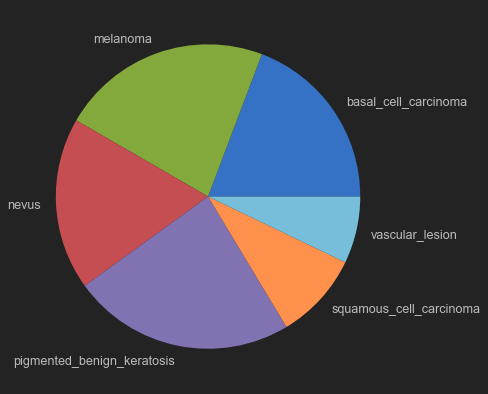

In [ ]:
fig1,ax1=plt.subplots()
ax1.pie(No_images_per_class,labels=Class_name)

# TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [ ]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [ ]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 1329 validated image filenames belonging to 6 classes.
Found 234 validated image filenames belonging to 6 classes.
Found 391 validated image filenames belonging to 6 classes.


MINI CHALLENGE #3:

- Experiment with other image augmentation strategies to the training data. Pick at least 1 augmentation strategy. 

HINT: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator




# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS (CNN) AND RESIDUAL BLOCKS

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

MINI CHALLENGE #4:
- What is the performance of ResNets on the ImageNet datasets? (External Research is required)

# TASK #6: BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [ ]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(6, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [ ]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 15, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/15
41/41 [==============================] - 516s 11s/step - loss: 3.3627 - accuracy: 0.3392 - val_loss: 1.9955 - val_accuracy: 0.0714

Epoch 00001: val_loss improved from inf to 1.99555, saving model to weights.hdf5


C:\Users\biokk\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
41/41 [==============================] - 377s 9s/step - loss: 1.4899 - accuracy: 0.4665 - val_loss: 1.9683 - val_accuracy: 0.2321

Epoch 00002: val_loss improved from 1.99555 to 1.96827, saving model to weights.hdf5
Epoch 3/15
41/41 [==============================] - 369s 9s/step - loss: 1.2584 - accuracy: 0.5266 - val_loss: 1.9188 - val_accuracy: 0.2366

Epoch 00003: val_loss improved from 1.96827 to 1.91883, saving model to weights.hdf5
Epoch 4/15
41/41 [==============================] - 356s 9s/step - loss: 1.1500 - accuracy: 0.5690 - val_loss: 2.0471 - val_accuracy: 0.1652

Epoch 00004: val_loss did not improve from 1.91883
Epoch 5/15
41/41 [==============================] - 393s 10s/step - loss: 1.1246 - accuracy: 0.5767 - val_loss: 2.6087 - val_accuracy: 0.2277

Epoch 00005: val_loss did not improve from 1.91883
Epoch 6/15
41/41 [==============================] - 390s 9s/step - loss: 1.0085 - accuracy: 0.6353 - val_loss: 2.3351 - val_accuracy: 0.2411

Epoch 00006: val_

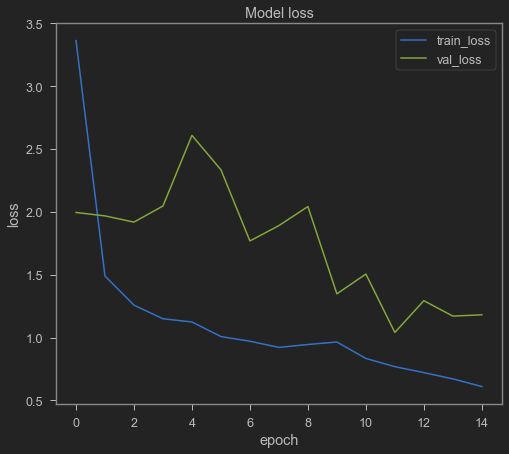

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


MINI CHALLENGE #5: 
 - Try a different optimizer and retrain the model 
 - Change the value of patience in early stopping


# TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

![image.png](attachment:image.png)

In [ ]:
model.load_weights("weights.hdf5")

In [ ]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

12/12 [==============================] - 43s 4s/step - loss: 0.9901 - accuracy: 0.6198
Accuracy Test : 0.6197916865348816


In [ ]:
# Assigning label names to the corresponding indexes
labels = {0: 'basal_cell_carcinoma', 1: 'melanoma', 2: 'nevus', 3:'pigmented_benign_keratosis', 4: 'squamous_cell_carcinoma', 5:'vascular_lesion'}

In [ ]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [ ]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.6138107416879796


In [ ]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

MINI CHALLENGE #6: 
 - print out the classification report 
 - print out the confusion matrix and comment on the model performance


# GREAT JOB!

MINI CHALLENGE #1 SOLUTION: 
- Print out the count plot for all classes using Seaborn (External Research is Required)


C:\Users\biokk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

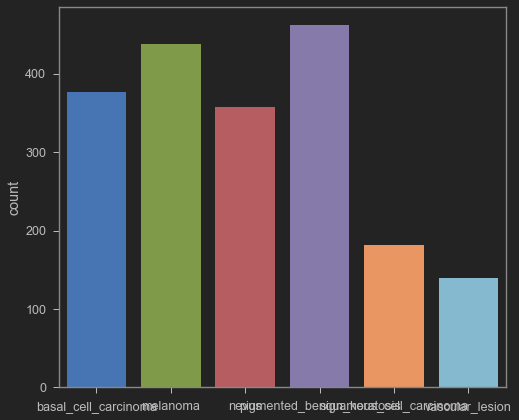

In [ ]:
sns.countplot(label)

MINI CHALLENGE #2 SOLUTION: 
- Plot a pie chart showing the percentage of samples per class. 

<function matplotlib.pyplot.show(close=None, block=None)>

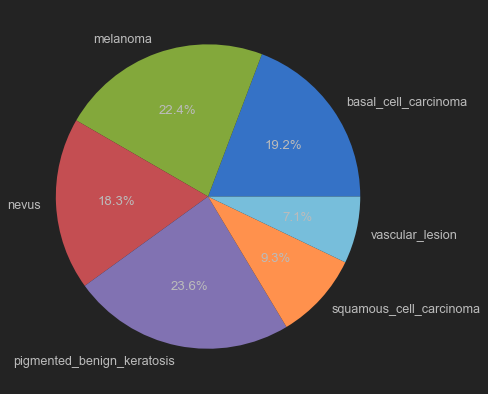

In [ ]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

MINI CHALLENGE #3 SOLUTION:

- Experiment with other image augmentation strategies to the training data. Pick at least 1 augmentation strategy. 

HINT: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator




In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

MINI CHALLENGE #4 SOLUTION:
- What is the performance of ResNets on the ImageNet datasets? (External Research is required)

Error is approximately 3.6%

MINI CHALLENGE #5 SOLUTION: 
 - Try a different optimizer and retrain the model 
 - Change the value of patience in early stopping


- Try optimizers like adam, ndam
- Change the value of patience to 25 

MINI CHALLENGE #6 SOLUTION: 
 - print out the classification report 
 - print out the confusion matrix and comment on the model performance

In [ ]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                            precision    recall  f1-score   support

      basal_cell_carcinoma       0.52      0.74      0.61        62
                  melanoma       0.65      0.84      0.73        94
                     nevus       0.71      0.21      0.32        73
pigmented_benign_keratosis       0.64      0.74      0.68        95
   squamous_cell_carcinoma       0.25      0.08      0.12        37
           vascular_lesion       0.71      0.90      0.79        30

                  accuracy                           0.61       391
                 macro avg       0.58      0.58      0.54       391
              weighted avg       0.60      0.61      0.57       391



Text(0.5, 1.0, 'Confusion_matrix')

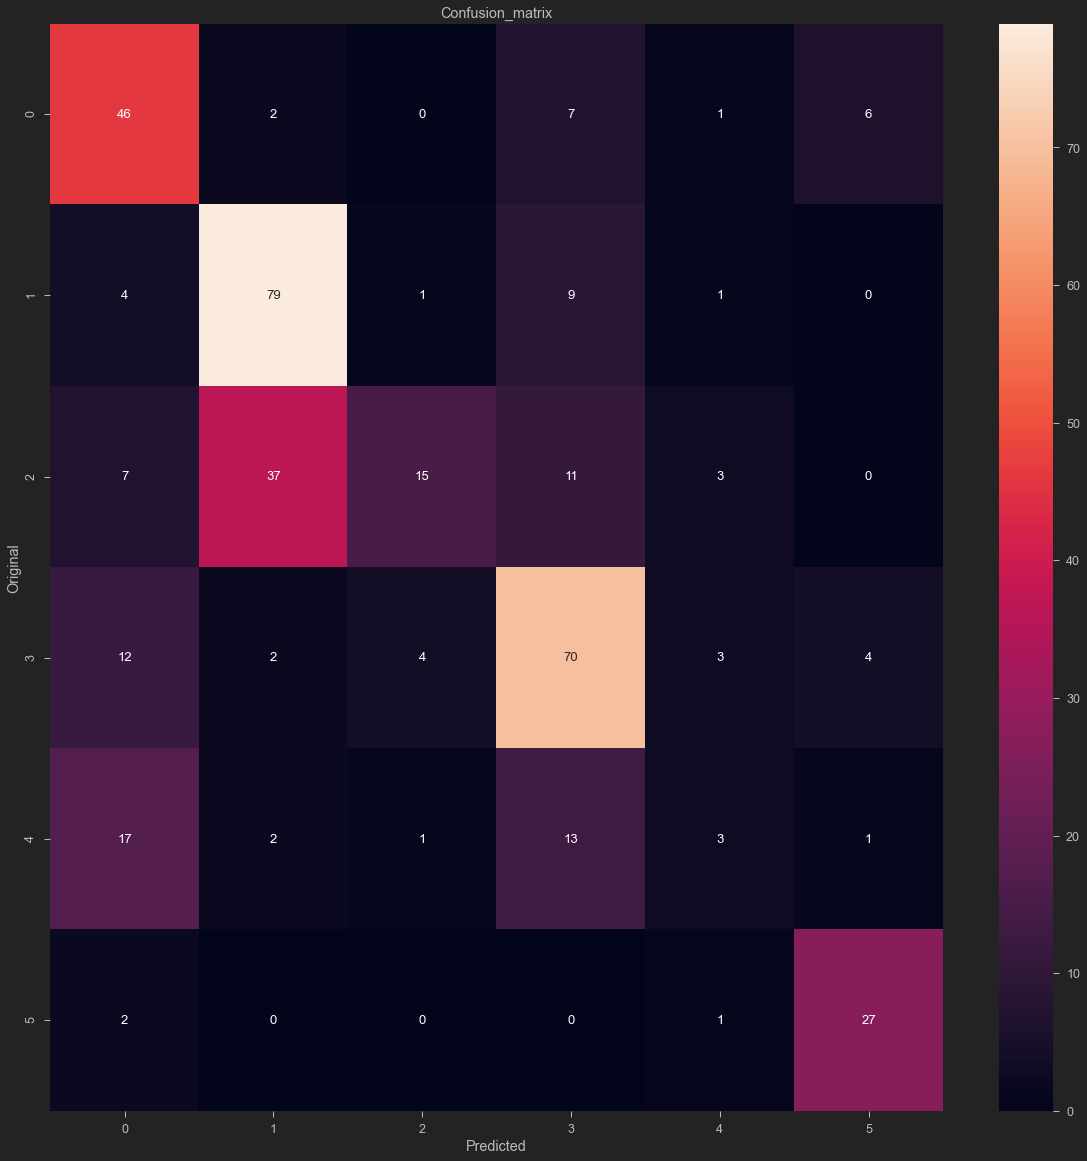

In [ ]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
